In [11]:
library("ggplot2")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [91]:
time_dot <- function(samples_num, dot_seq) {
    output <- data.frame("Type" = character(), "Length" = integer(), "Time [s]" = double())
    for (size in dot_seq) {
        measurements <- list()
        for (i in seq(1, samples_num)) {
            v1 <- sample(1:1000, size, replace = TRUE)
            v2 <- sample(1:1000, size, replace = TRUE)
            
            s_time <- Sys.time()
            sum(v1 * v2)
            e_time <- Sys.time()
            
            exec_time <- as.numeric(e_time - s_time, units = "secs")
            measurements[[i]] <- data.frame("Type" = "Dot product", "Length" = size, "Time [s]" = exec_time)
        }
        tmp <- do.call(rbind, measurements)
        output <- rbind(output, tmp)
    }
    return (output)
}

time_mlp <- function(samples_num, mlp_seq) {
    output <- data.frame("Type" = character(), "Length" = integer(), "Time [s]" = double())
    for (size in mlp_seq) {
        measurements <- list()
        for (i in seq(1, samples_num)) {
            m1 <- matrix(rnorm(size ^ 2), nrow = size, ncol = size)
            m2 <- matrix(rnorm(size ^ 2), nrow = size, ncol = size)
            
            s_time <- Sys.time()
            sum(m1 %*% m2)
            e_time <- Sys.time()
            
            exec_time <- as.numeric(e_time - s_time, units = "secs")
            measurements[[i]] = data.frame("Type" = "Matrix MLP", "Length" = size, "Time [s]" = exec_time)
        }
        tmp <- do.call(rbind, measurements)
        output <- rbind(output, tmp)
    }
    return (output)
}

In [159]:
samples_num <- 10

dot_lb <- 100000
dot_ub <- 1000000
dot_s <- 50000
dot_seq <- seq(dot_lb, dot_ub, dot_s)

mlp_lb <- 200
mlp_ub <- 1000
mlp_s <- 50
mlp_seq <- seq(mlp_lb, mlp_ub, mlp_s)

dot_times <- time_dot(samples_num, dot_seq)
mlp_times <- time_mlp(samples_num, mlp_seq)

In [160]:
get_dot_means <- function(dot_times, dot_seq, samples_num) {
    dot_means <- list()
    j <- 1
    for (i in dot_seq) {
        samples_range <- ((j - 1) * samples_num + 1):(j * samples_num)
        dot_means[[j]] <- data.frame("Type" = "Dot mean", "Length" = i, "Time" = mean(dot_times[samples_range, -(1:2)]))
        j <- j + 1
    }
    return (do.call(rbind, dot_means))
}

get_mlp_means <- function(mlp_times, mlp_seq, samples_num) {
    mlp_means <- list()
    j <- 1
    for (i in mlp_seq) {
        samples_range <-((j - 1) * samples_num + 1):(j * samples_num)
        mlp_means[[j]] <- data.frame("Type" = "MLP mean", "Length" = i, "Time" = mean(mlp_times[samples_range, -(1:2)]))
        j <- j + 1
    }
    return (do.call(rbind, mlp_means))
}

get_dot_sds <- function(dot_times, dot_seq, samples_num) {
    dot_sds <- list()
    j <- 1
    for (i in dot_seq) {
        samples_range <-((j - 1) * samples_num + 1):(j * samples_num)
        dot_sds[[j]] <- data.frame("Type" = "MLP mean", "Length" = i, "Time" = sd(dot_times[samples_range, -(1:2)]))
        j <- j + 1
    }
    return (do.call(rbind, dot_sds))
}

get_mlp_sds <- function(mlp_times, mlp_seq, samples_num) {
    mlp_sds <- list()
    j <- 1
    for (i in mlp_seq) {
        samples_range <-((j - 1) * samples_num + 1):(j * samples_num)
        mlp_sds[[j]] <- data.frame("Type" = "MLP mean", "Length" = i, "Time" = sd(mlp_times[samples_range, -(1:2)]))
        j <- j + 1
    }
    return (do.call(rbind, mlp_sds))
}


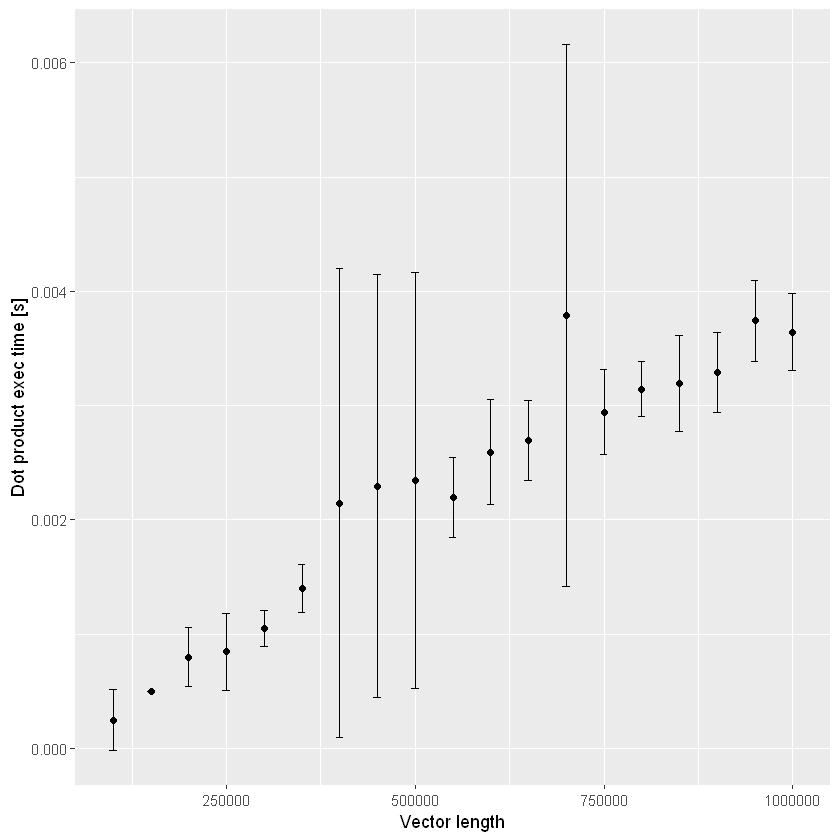

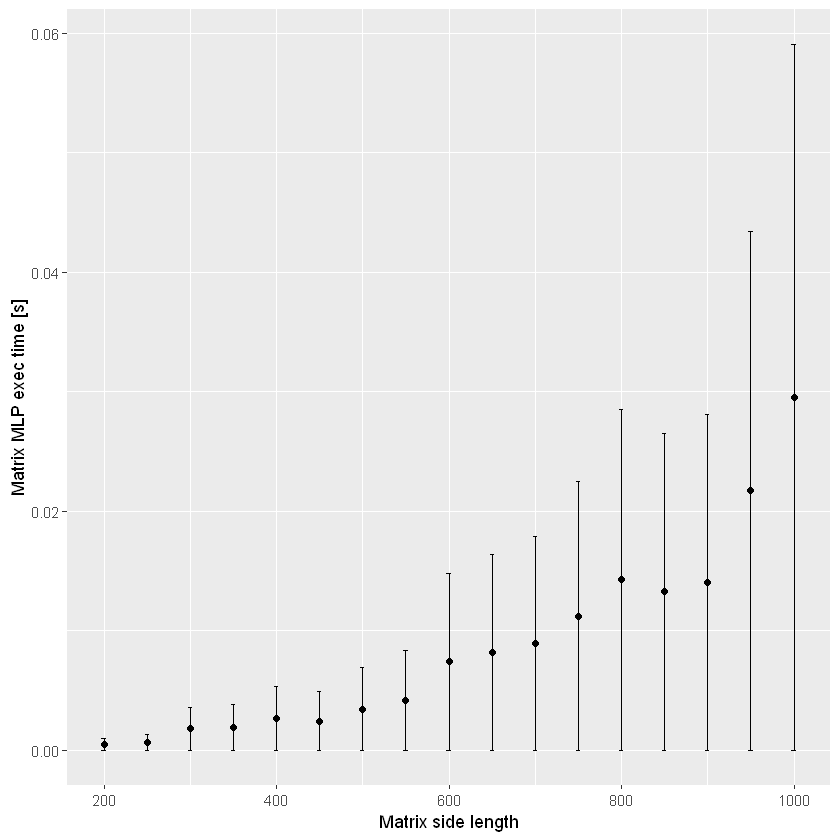

In [161]:
dot_means <- get_dot_means(dot_times, dot_seq, samples_num)
mlp_means <- get_mlp_means(mlp_times, mlp_seq, samples_num)
dot_sds <- get_dot_sds(dot_times, dot_seq, samples_num)
mlp_sds <- get_mlp_means(mlp_times, mlp_seq, samples_num)

dot_mean_points <- dot_means[, -1]
dot_mean_x <- dot_means[, 2]
dot_mean_y <- dot_means[, 3]
dot_sd_y <- dot_sds[, 3]

mlp_mean_points <- mlp_means[, -1]
mlp_mean_x <- mlp_means[, 2]
mlp_mean_y <- mlp_means[, 3]
mlp_sd_y <- mlp_sds[, 3]

dot_plot <- ggplot(dot_mean_points, aes(dot_mean_x, dot_mean_y)) + geom_point()
dot_plot <- dot_plot + labs(x = "Vector length", y = "Dot product exec time [s]")
dot_plot <- dot_plot + geom_errorbar(aes(ymin = dot_mean_y - dot_sd_y, ymax = dot_mean_y + dot_sd_y), width=10000) 
print(dot_plot)

mlp_plot <- ggplot(mlp_mean_points, aes(mlp_mean_x, mlp_mean_y)) + geom_point()
mlp_plot <- mlp_plot + labs(x = "Matrix side length", y = "Matrix MLP exec time [s]")
mlp_plot <- mlp_plot + geom_errorbar(aes(ymin = mlp_mean_y - mlp_sd_y, ymax = mlp_mean_y + mlp_sd_y), width=5) 
print(mlp_plot)

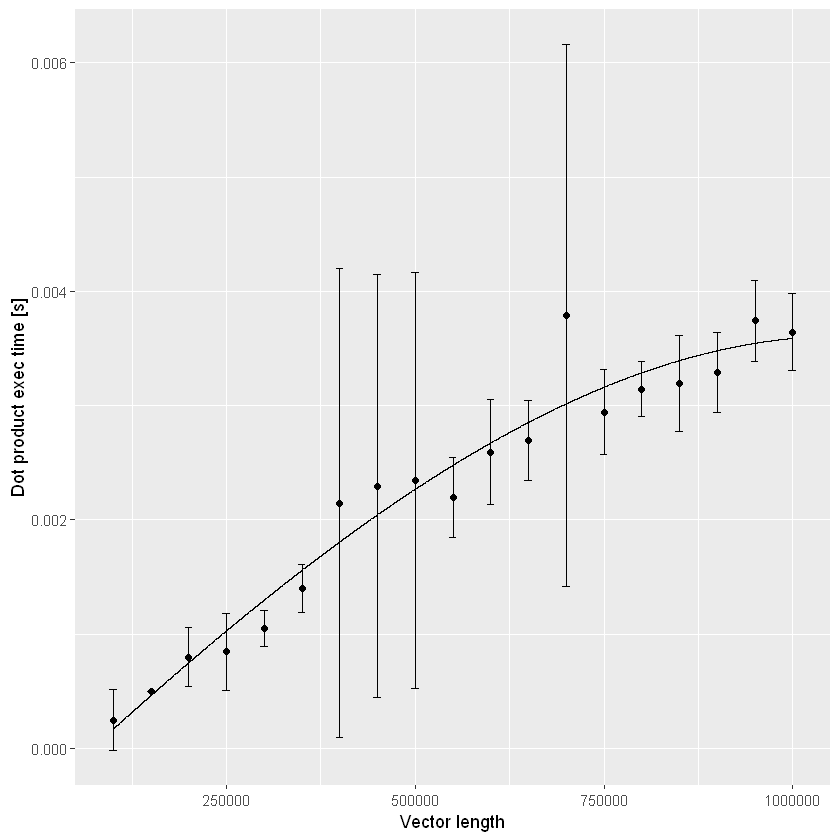

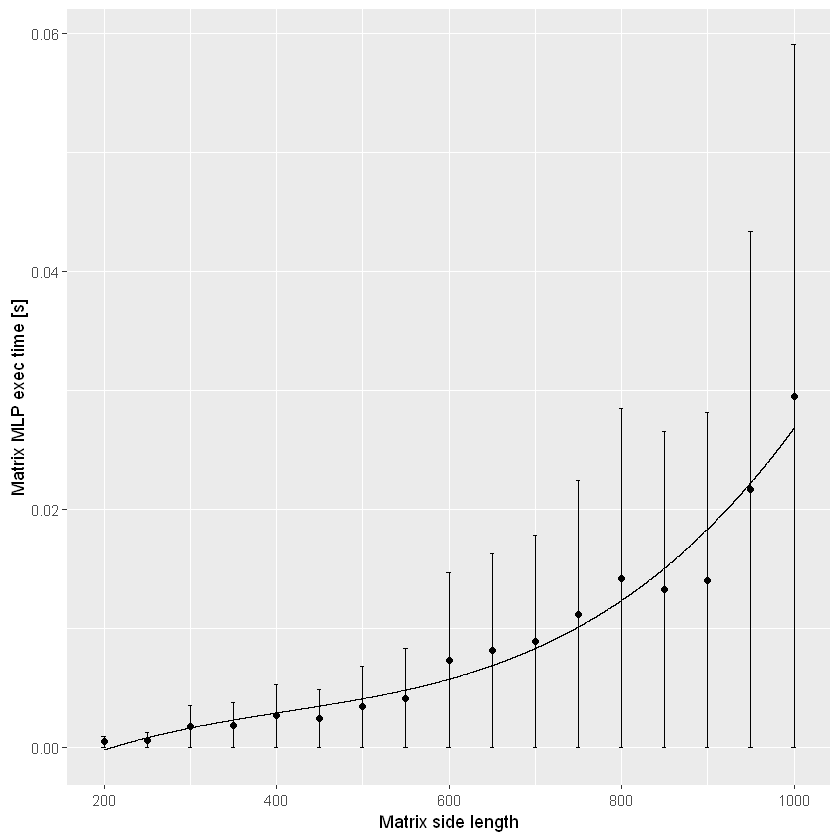

In [162]:
dot_fit = lm(dot_mean_y ~ poly(dot_mean_x, 3, raw=TRUE), data=dot_mean_points)
tmp <- data.frame(dot_mean_x = seq(dot_lb, dot_ub, length.out = 100000))
tmp$dot_mean_y = predict(dot_fit, tmp)
print(dot_plot + geom_line(data=tmp, aes(dot_mean_x, dot_mean_y)))

mlp_fit = lm(mlp_mean_y ~ poly(mlp_mean_x, 3, raw=TRUE), data=mlp_mean_points)
tmp <- data.frame(mlp_mean_x = seq(mlp_lb, mlp_ub, length.out = 100000))
tmp$mlp_mean_y = predict(mlp_fit, tmp)
print(mlp_plot + geom_line(data=tmp, aes(mlp_mean_x, mlp_mean_y)))

In [163]:
print(mean(mlp_times[100:110, 3]))
print(mean(mlp_times[90:100, 3]))

[1] 0.0088043
[1] 0.007985765


In [164]:
# install.packages("googlesheets")

also installing the dependencies 'sys', 'askpass', 'rematch', 'tidyselect', 'BH', 'plogr', 'curl', 'mime', 'openssl', 'hms', 'clipr', 'stringi', 'cellranger', 'dplyr', 'httr', 'purrr', 'readr', 'stringr', 'tidyr', 'xml2'



package 'sys' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'rematch' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'BH' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'clipr' successfully unpacked and MD5 sums checked
package 'stringi' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'httr' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 su